# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

Dataset Source : [Click Here](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis)

Penipuan Penyedia Layanan adalah salah satu masalah terbesar yang dihadapi Medicare. Menurut pemerintah, total pengeluaran Medicare meningkat secara eksponensial karena adanya kecurangan dalam klaim Medicare. Penipuan layanan kesehatan adalah kejahatan terorganisir yang melibatkan rekan-rekan penyedia layanan kesehatan, dokter, penerima manfaat yang bekerja sama untuk membuat klaim penipuan.

Analisis yang ketat terhadap data Medicare telah menghasilkan banyak dokter yang terlibat dalam penipuan. Mereka mengadopsi cara-cara di mana kode diagnosis yang ambigu digunakan untuk mengadopsi prosedur dan obat-obatan yang paling mahal. Perusahaan asuransi adalah institusi yang paling rentan terkena dampak dari praktik buruk ini. Karena alasan ini, perusahaan asuransi meningkatkan premi asuransi mereka dan akibatnya perawatan kesehatan menjadi mahal dari hari ke hari.

Penipuan dan penyalahgunaan layanan kesehatan datang dalam berbagai bentuk. Beberapa jenis penipuan yang paling umum dilakukan oleh penyedia layanan kesehatan adalah:

    a) Penagihan untuk layanan yang tidak diberikan.

    b) Pengajuan klaim ganda untuk layanan yang sama.

    c) Menyalahartikan layanan yang diberikan.

    d) Menagih layanan yang lebih kompleks atau mahal daripada yang sebenarnya diberikan.

    e) Menagih layanan yang ditanggung ketika layanan yang diberikan sebenarnya tidak ditanggung.

Pernyataan Masalah
Tujuan dari proyek ini adalah untuk "memprediksi penyedia layanan yang berpotensi melakukan penipuan" berdasarkan klaim yang diajukan oleh mereka. Bersamaan dengan itu, kami juga akan menemukan variabel-variabel penting yang membantu dalam mendeteksi perilaku penyedia layanan yang berpotensi melakukan penipuan. Selanjutnya, kami akan mempelajari pola penipuan dalam klaim penyedia layanan untuk memahami perilaku penyedia layanan di masa depan.

Pengantar Dataset
Untuk tujuan proyek ini, kami mempertimbangkan klaim Rawat Inap, klaim Rawat Jalan, dan rincian Penerima Manfaat dari setiap penyedia layanan. Mari kita lihat rinciannya:

    A) Data Rawat Inap (Inpatient Data)

Data ini memberikan wawasan tentang klaim yang diajukan untuk pasien yang dirawat di rumah sakit. Data ini juga memberikan rincian tambahan seperti tanggal masuk dan keluar serta kode diagnosis.

    B) Data Pasien Rawat Jalan (Outpatient Data)

Data ini memberikan rincian tentang klaim yang diajukan untuk pasien yang mengunjungi rumah sakit dan tidak dirawat di dalamnya.

    C) Data Detail Penerima Manfaat (Beneficiary Details Data)

Data ini berisi rincian KYC penerima manfaat seperti kondisi kesehatan, wilayah tempat tinggal, dll.

**Intpatient**
1. BeneID: Ini adalah ID unik untuk setiap pasien yang membuat klaim. Ini membantu dalam mengidentifikasi pasien secara unik.
2. ClaimID: Ini adalah ID unik untuk setiap klaim yang diajukan. Setiap klaim memiliki nomor identifikasi yang berbeda.
3. ClaimStartDt: Tanggal awal klaim. Ini adalah tanggal ketika layanan medis dimulai.
4. ClaimEndDt: Tanggal akhir klaim. Ini adalah tanggal ketika layanan medis selesai atau berakhir.
5. Provider: Ini adalah ID unik untuk penyedia layanan medis atau rumah sakit di mana pasien menerima perawatan.
6. InscClaimAmtReimbursed: Jumlah yang diklaim atau diminta oleh penyedia layanan medis untuk biaya perawatan pasien. Ini adalah jumlah yang diminta untuk penggantian biaya.
7. AttendingPhysician: Nama atau ID dokter yang merawat pasien selama periode klaim.
8. OperatingPhysician: Nama atau ID dokter yang melakukan operasi jika ada operasi yang terlibat.
9. OtherPhysician: Nama atau ID dokter lain yang terlibat dalam perawatan pasien selama periode klaim.
10. AdmissionDt: Tanggal masuk pasien ke rumah sakit.
11. ClmAdmitDiagnosisCode: Kode diagnosis saat pasien masuk ke rumah sakit.
12. DeductibleAmtPaid: Jumlah deductible yang dibayarkan oleh pasien atau asuransi sebelum asuransi mulai memberikan penggantian biaya.
13. DischargeDt: Tanggal pasien keluar dari rumah sakit setelah perawatan.
14. DiagnosisGroupCode: Kode yang mengelompokkan diagnosis pasien ke dalam kelompok tertentu.
15. ClmDiagnosisCode_1, ClmDiagnosisCode_2, dan seterusnya: Kode diagnosis yang digunakan untuk mengidentifikasi kondisi medis pasien. Ada beberapa kolom ini untuk mewakili
16. diagnosis yang mungkin lebih dari satu.
17. ClmProcedureCode_1, ClmProcedureCode_2, dan seterusnya: Kode prosedur medis yang mungkin dilakukan selama perawatan. Seperti diagnosis, ada beberapa kolom ini untuk
18. mewakili lebih dari satu prosedur yang mungkin dilakukan.
19. ClmProcedureCode_6: Ini adalah kolom yang nampaknya tidak memiliki data, sehingga tidak digunakan dalam analisis.

**Outpatient**
1. BeneID: ID unik pasien yang membuat klaim.
2. ClaimID: ID unik klaim yang diajukan oleh pasien.
3. ClaimStartDt: Tanggal awal klaim (kunjungan medis dimulai).
4. ClaimEndDt: Tanggal akhir klaim (kunjungan medis selesai).
5. Provider: ID unik penyedia layanan medis atau rumah sakit yang dikunjungi.
6. InscClaimAmtReimbursed: Jumlah klaim yang diminta oleh penyedia layanan medis.
7. AttendingPhysician: Nama atau ID dokter yang merawat pasien.
8. OperatingPhysician: Nama atau ID dokter yang terlibat dalam operasi atau prosedur medis (jika ada).
9. OtherPhysician: Nama atau ID dokter lain yang terlibat dalam perawatan pasien.
10. ClmDiagnosisCode_1 hingga ClmDiagnosisCode_10: Kode diagnosis untuk kondisi medis pasien.
11. ClmProcedureCode_1 hingga ClmProcedureCode_4: Kode prosedur medis yang mungkin dilakukan selama kunjungan medis.
12. DeductibleAmtPaid: Jumlah deductible yang dibayarkan oleh pasien atau asuransi.
13. ClmAdmitDiagnosisCode: Kode diagnosis yang berkaitan dengan alasan kunjungan pasien ke rumah sakit (meskipun pasien tidak dirawat di dalam rumah sakit).


**Beneficiary**
1. BeneID: ID unik untuk penerima manfaat, digunakan untuk mengidentifikasi penerima manfaat secara unik.
2. DOB (Date of Birth): Tanggal lahir penerima manfaat.
3. DOD (Date of Death): Tanggal kematian penerima manfaat (jika telah meninggal).
4. Gender: Jenis kelamin penerima manfaat (misalnya, 0 mewakili perempuan, 1 mewakili laki-laki).
5. Race: Kategori ras penerima manfaat (dalam bentuk kode atau representasi numerik).
6. RenalDiseaseIndicator: Indikator penyakit ginjal (biasanya 'Y' untuk ya atau 'N' untuk tidak).
7. State: Kode negara bagian tempat tinggal penerima manfaat.
8. County: Kode kabupaten tempat tinggal penerima manfaat.
9. NoOfMonths_PartACov: Jumlah bulan dengan cakupan Medicare Bagian A (rawat inap).
10. NoOfMonths_PartBCov: Jumlah bulan dengan cakupan Medicare Bagian B (rawat jalan).
11. hingga 20. Chronic Conditions (ChronicCond_*): Indikator kondisi kronis seperti Alzheimer, gagal jantung, penyakit ginjal, kanker, dll. (biasanya '1' untuk ya atau '0' untuk tidak memiliki kondisi tersebut).
12. IPAnnualReimbursementAmt: Jumlah penggantian tahunan untuk rawat inap.
13. IPAnnualDeductibleAmt: Jumlah deductible tahunan untuk rawat inap.
14. OPAnnualReimbursementAmt: Jumlah penggantian tahunan untuk rawat jalan.
15. OPAnnualDeductibleAmt: Jumlah deductible tahunan untuk rawat jalan.

In [3]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

**Beneficiary**

In [5]:
Test_Beneficiary = pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
print(Test_Beneficiary.shape)
Test_Beneficiary.head(3)

(63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660


In [6]:
Train_Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
print(Train_Beneficiary.shape)
Train_Beneficiary.head(3)

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


**Inpatient**

In [7]:
Test_Inpatient = pd.read_csv('Test_Inpatientdata-1542969243754.csv')
print(Test_Inpatient.shape)
Test_Inpatient.head(3)

(9551, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Train_Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
print(Train_Inpatient.shape)
Train_Inpatient.head(3)

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Outpatient**

In [9]:
Test_Outpatient = pd.read_csv('Test_Outpatientdata-1542969243754.csv')
print(Test_Outpatient.shape)
Test_Outpatient.head(3)

(125841, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
Train_Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
print(Train_Outpatient.shape)
Train_Outpatient.head(3)

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


**Test Train Data**

In [11]:
Train = pd.read_csv('Train-1542865627584.csv')
print(Train.shape)
Train.head(3)

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [12]:
Test = pd.read_csv('Test-1542969243754.csv')
print(Test.shape)
Test.head(3)

(1353, 1)


,Provider
0,PRV51002
1,PRV51006
2,PRV51009


# EDA

## Beneficiary

In [13]:
Train_Beneficiary.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


**Duplicated**

In [14]:
print("Data Duplikat : ", Train_Beneficiary.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Beneficiary.duplicated(subset='BeneID').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  0


**Info**

In [15]:
Train_Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

**Missing Value**

In [16]:
miss_value = pd.DataFrame( data = Train_Beneficiary.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Beneficiary.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Beneficiary.isna().sum() / len(Train_Beneficiary) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

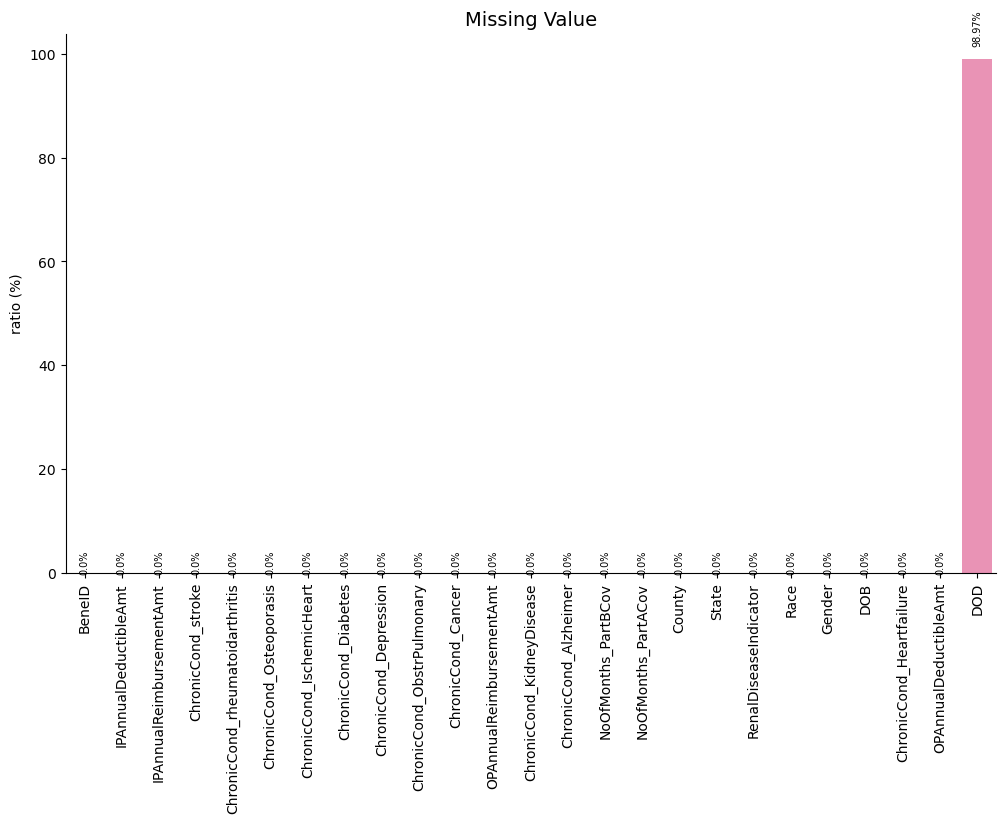

In [17]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Change An Invalid Data Type**

In [18]:
print("Before\nDtype : ",Train_Beneficiary['DOB'].dtypes)
print("Dtype : ",Train_Beneficiary['DOD'].dtypes)

Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB']) # DOB (Object > Datetime)
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD']) # DOD (Object > Datetime)

print("After\nDtype : ",Train_Beneficiary['DOB'].dtypes)
print("Dtype : ",Train_Beneficiary['DOD'].dtypes)

Before
Dtype :  object
Dtype :  object
After
Dtype :  datetime64[ns]
Dtype :  datetime64[ns]


### Univariate & Multivariate Analysis

**Distribusi Umur**

In [19]:
Train_Beneficiary.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40


Max Date Of Dead :  2009.0


<AxesSubplot:title={'center':'Distribusi Umur'}, xlabel='Age', ylabel='Count'>

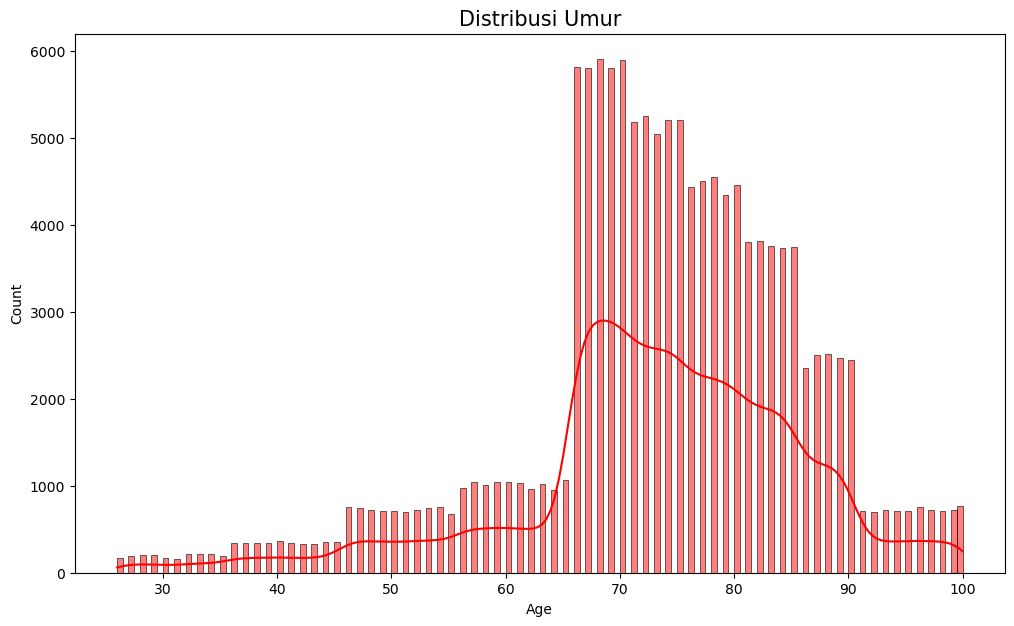

In [20]:
# Maximum Date of Deate adalah 20019, Maka Kita anggap data diambil di Tahun 2009
print("Max Date Of Dead : ",Train_Beneficiary['DOD'].dt.year.max())

Train_Beneficiary['Age'] = 2009 - Train_Beneficiary['DOB'].dt.year 


plt.figure(figsize=(12,7))
plt.title("Distribusi Umur", fontsize=15)
sns.histplot(data=Train_Beneficiary, x='Age',  kde = True, color = "Red")

**Value Count Chronic Condition**

Text(0.5, 1.02, 'Grafik Distribusi Kondisi Kronis')

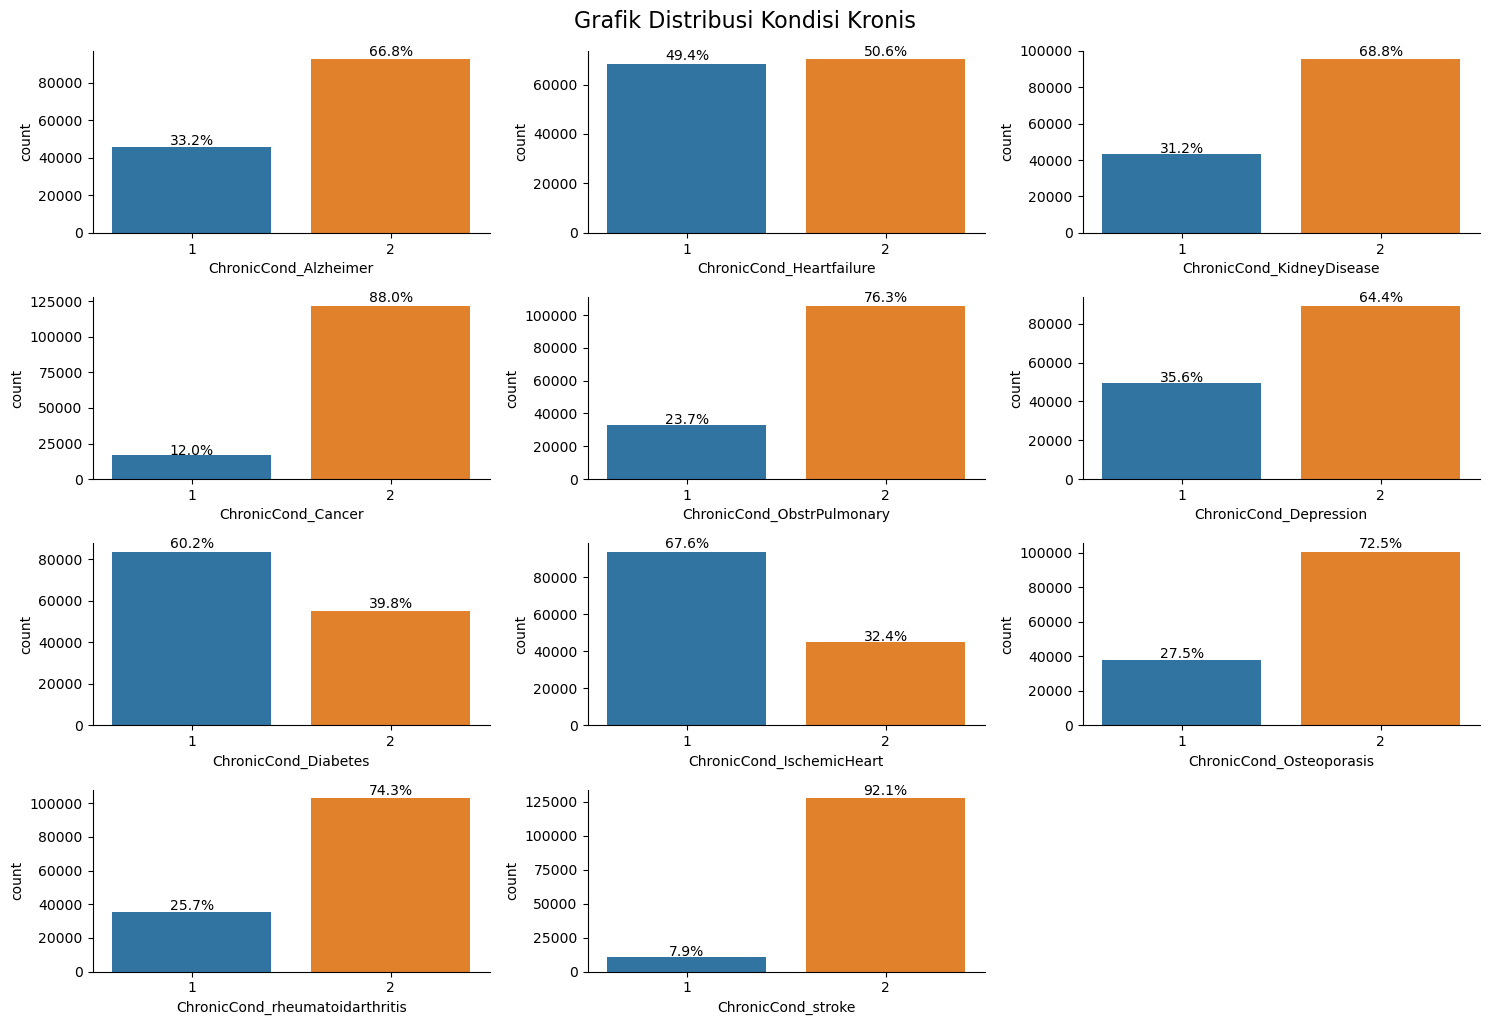

In [21]:
Chronic_feature = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression',
       	'ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

plt.figure(figsize=(15,10))
for i in range(len(Chronic_feature)):
    plt.subplot(4,3,i+1)
    fig = sns.countplot(data=Train_Beneficiary, x=Chronic_feature[i])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.tight_layout()
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],1))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=10, rotation=0)

plt.suptitle('Grafik Distribusi Kondisi Kronis', fontsize=16, y=1.02)

**Distribution Reimbursement Deductible**

Text(0.5, 1.02, 'Grafik Distribusi Reimbursement & Deductible')

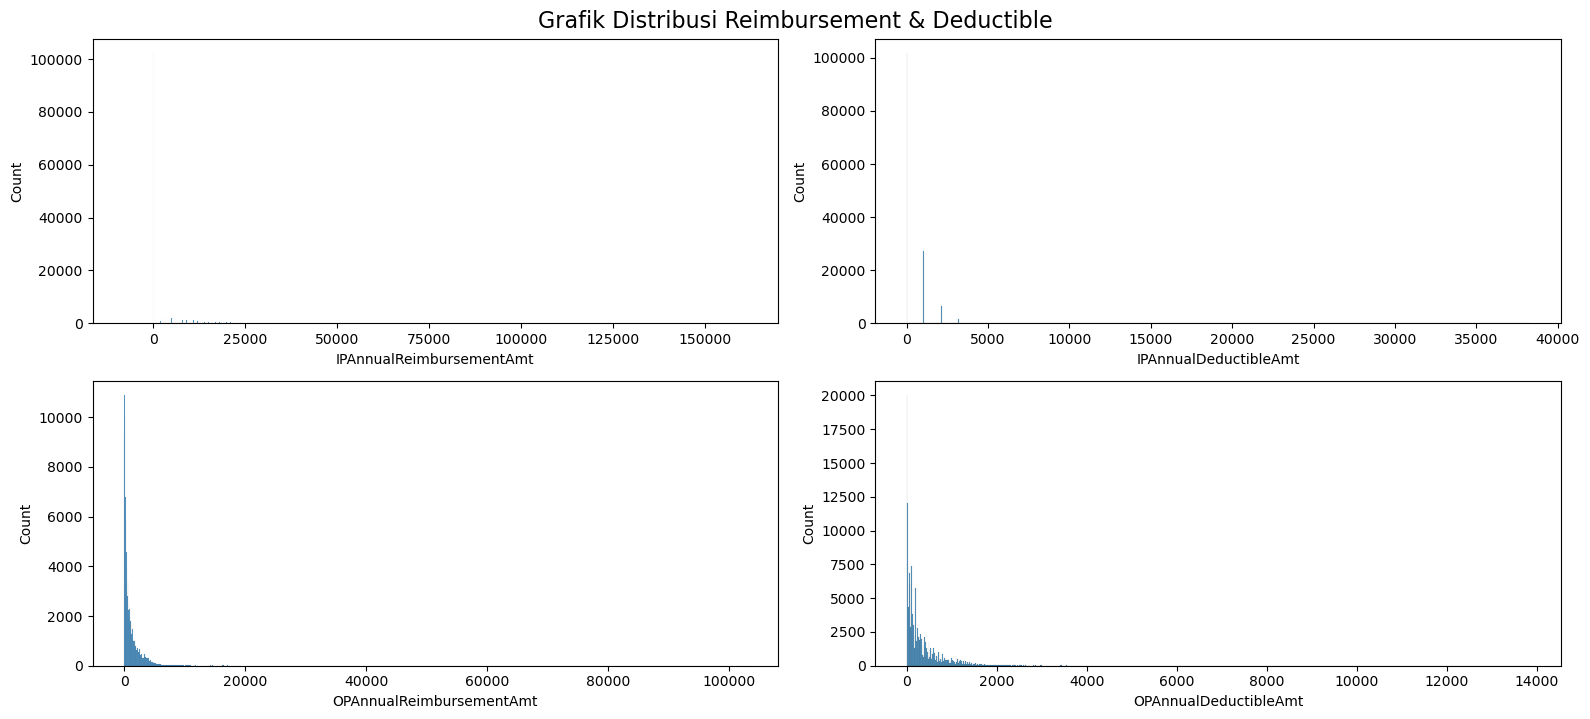

In [22]:
Amount = ['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']

plt.figure(figsize=(16,7))
for i in range(len(Amount)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=Train_Beneficiary, x=Amount[i])
    plt.tight_layout()
plt.suptitle('Grafik Distribusi Reimbursement & Deductible', fontsize=16, y=1.02)

**Value Count (Gender, Race, RenalDiseaseIndicator, NoOfMonths_PartACov, NoOfMonths_PartBCov)**

Text(0.5, 1.02, 'Grafik Distribusi Kondisi Kronis')

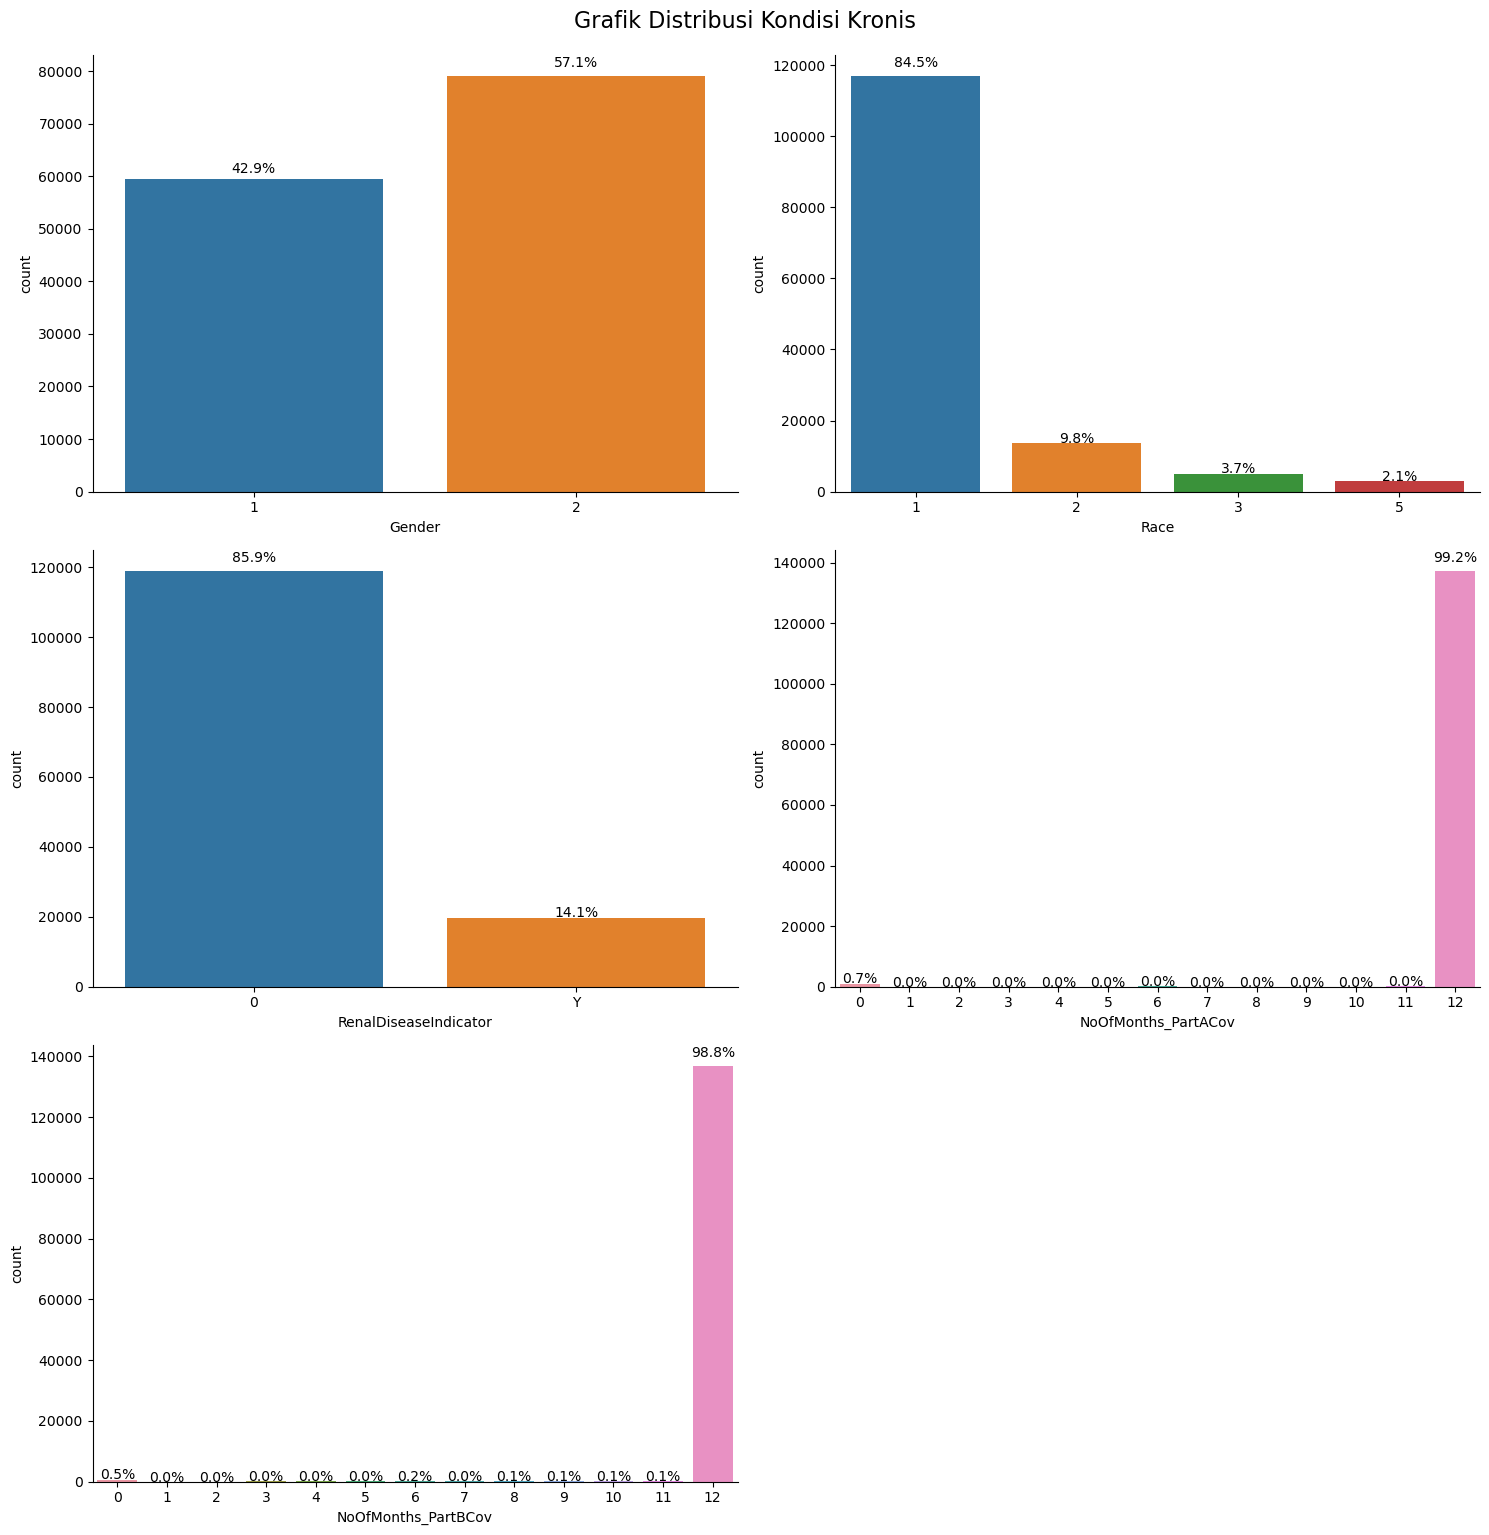

In [23]:
col = ['Gender','Race','RenalDiseaseIndicator','NoOfMonths_PartACov','NoOfMonths_PartBCov']
plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    fig= sns.countplot(data=Train_Beneficiary, x=col[i])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.tight_layout()
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/Train_Beneficiary.shape[0],1))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=10, rotation=0)

plt.suptitle('Grafik Distribusi Kondisi Kronis', fontsize=16, y=1.02)

## Inpatient

In [24]:
Train_Inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Duplicated**

In [25]:
print("Data Duplikat : ", Train_Inpatient.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Inpatient.duplicated(subset='BeneID').sum())
print("Feature (ClaimID) Duplikat : ", Train_Inpatient.duplicated(subset='ClaimID').sum())
print("Feature (Provider) Duplikat : ", Train_Inpatient.duplicated(subset='Provider').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  9185
Feature (ClaimID) Duplikat :  0
Feature (Provider) Duplikat :  38382


**Info**

In [26]:
Train_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

**Missing Value**

In [27]:
miss_value = pd.DataFrame( data = Train_Inpatient.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Inpatient.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Inpatient.isna().sum() / len(Train_Inpatient) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

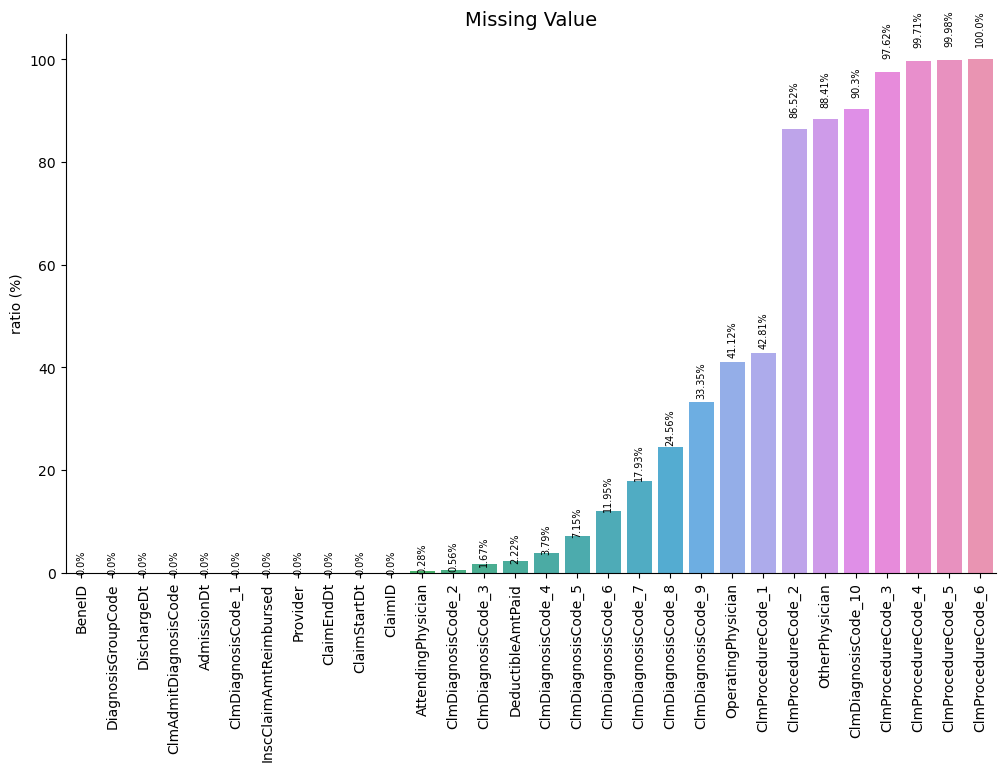

In [28]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Change An Invalid Data Type**

In [29]:
Train_Inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# ClaimStartDt  ClaimEndDt  AdmissionDt  DischargeDt (Object > Datetime)

print("Before\nClaimStartDt Dtype \t: ",Train_Inpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Inpatient['ClaimEndDt'].dtypes)
print("AdmissionDt Dtype \t: ",Train_Inpatient['AdmissionDt'].dtypes)
print("DischargeDt Dtype \t: ",Train_Inpatient['DischargeDt'].dtypes)

Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'])
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'])
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'])
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'])

print("After\n\nClaimStartDt Dtype \t: ",Train_Inpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Inpatient['ClaimEndDt'].dtypes)
print("AdmissionDt Dtype \t: ",Train_Inpatient['AdmissionDt'].dtypes)
print("DischargeDt Dtype \t: ",Train_Inpatient['DischargeDt'].dtypes)

Before
ClaimStartDt Dtype 	:  object
ClaimEndDt Dtype 	:  object
AdmissionDt Dtype 	:  object
DischargeDt Dtype 	:  object
After

ClaimStartDt Dtype 	:  datetime64[ns]
ClaimEndDt Dtype 	:  datetime64[ns]
AdmissionDt Dtype 	:  datetime64[ns]
DischargeDt Dtype 	:  datetime64[ns]


### Univariate & Multivariate Analysis

**Statistic Deskriptif (Numerical)**

In [31]:
Train_Inpatient.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


**Statistic Deskriptif (Categorical)**

In [32]:
Train_Inpatient[['BeneID','ClaimID','Provider','AttendingPhysician','OperatingPhysician','OtherPhysician']].describe()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
count,40474,40474,40474,40362,23830,4690
unique,31289,40474,2092,11604,8287,2877
top,BENE134170,CLM46614,PRV52019,PHY422134,PHY429430,PHY416093
freq,8,1,516,386,225,81


**Distribusi Reimbursement & Deductible**

Text(0.5, 1.02, 'Grafik Distribusi Kondisi Kronis')

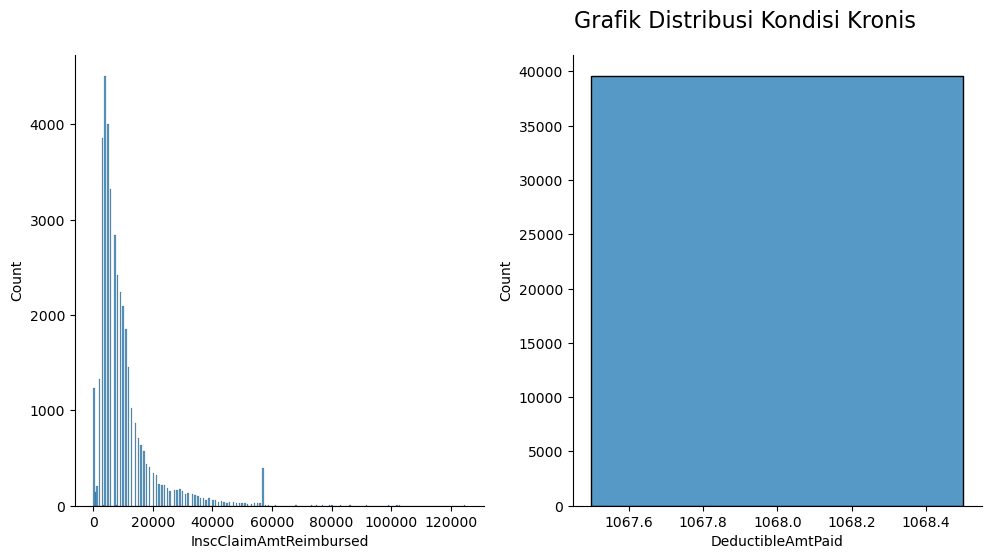

In [33]:
amount = ['InscClaimAmtReimbursed','DeductibleAmtPaid']

plt.figure(figsize=(15,15))

for i in range(len(amount)):
    plt.subplot(3,3,i+1)
    fig= sns.histplot(data=Train_Inpatient, x=amount[i])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.tight_layout()
plt.suptitle('Grafik Distribusi Kondisi Kronis', fontsize=16, y=1.02)

In [34]:
Train_Inpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Distribusi Claim Procedure Code**

Text(0.5, 1.02, 'Grafik Distribusi Kondisi Kronis')

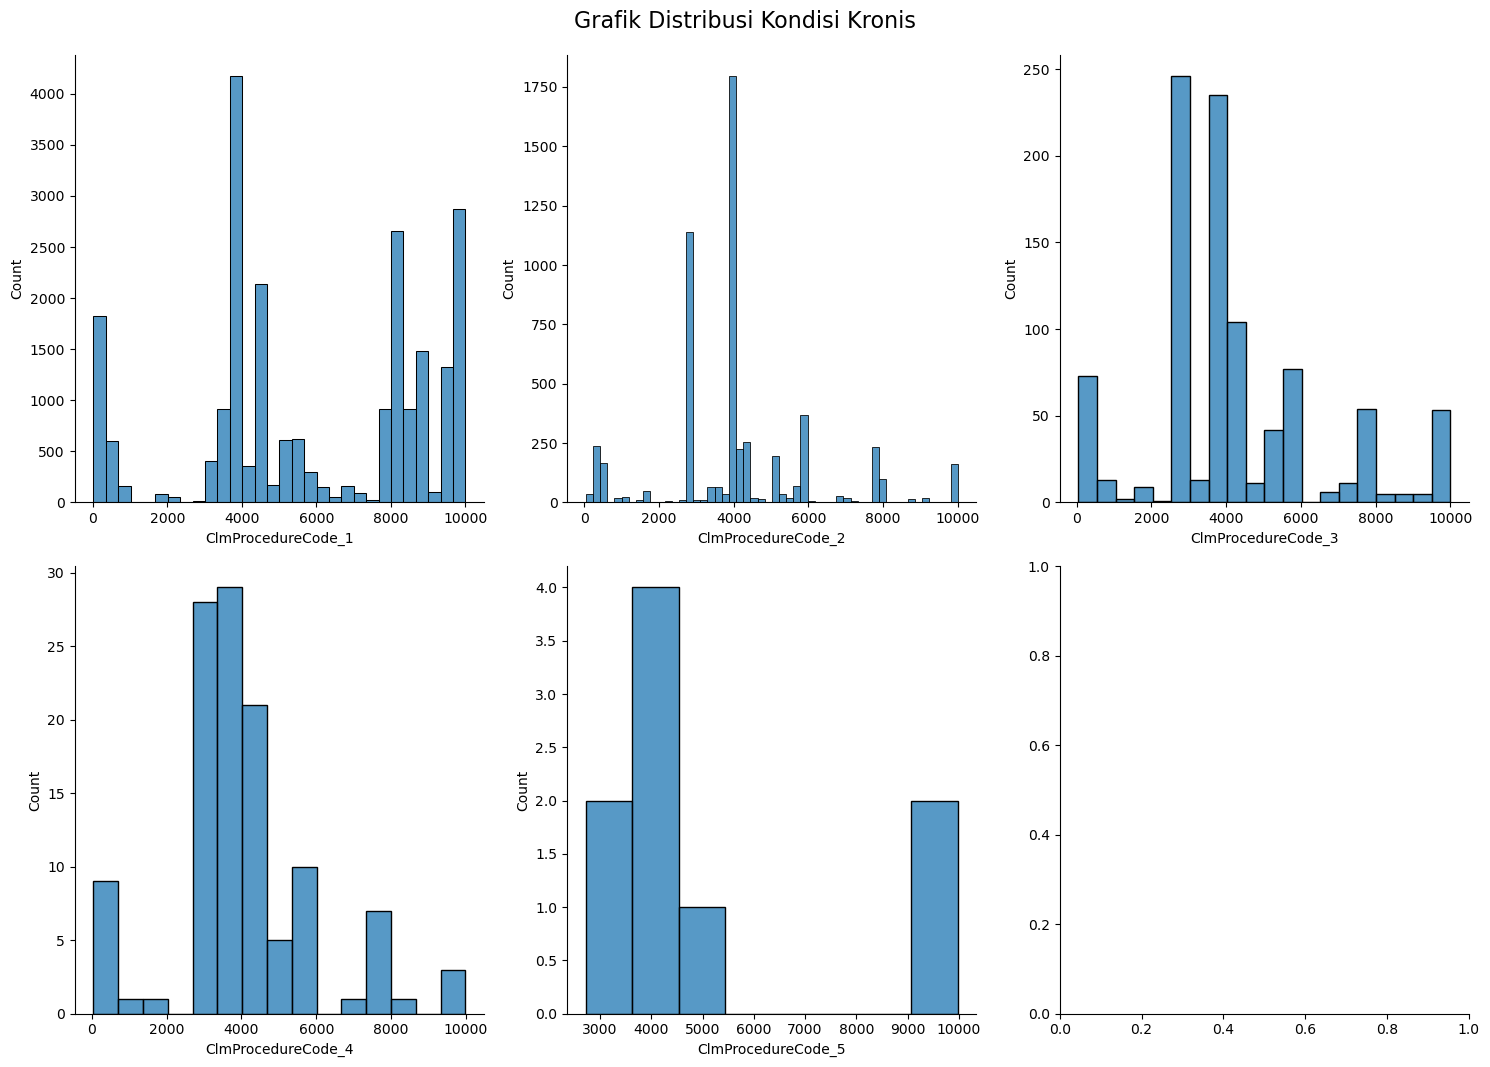

In [35]:
ClmProcedureCode = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3',
                    'ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']

plt.figure(figsize=(15,15))

for i in range(len(ClmProcedureCode)):
    plt.subplot(3,3,i+1)
    fig= sns.histplot(data=Train_Inpatient, x=ClmProcedureCode[i])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.tight_layout()
plt.suptitle('Grafik Distribusi Kondisi Kronis', fontsize=16, y=1.02)

<AxesSubplot:>

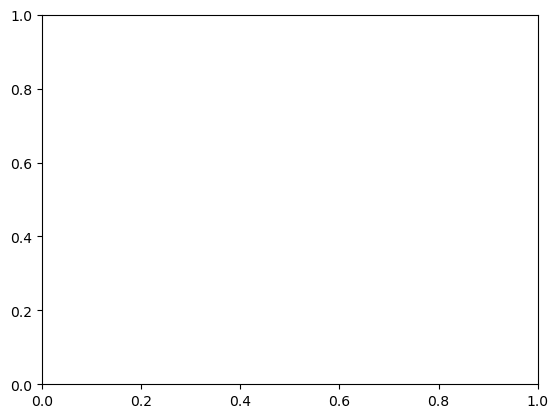

In [36]:
sns.lineplot()

## Outpatient

In [37]:
Train_Outpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


**Duplicated**

In [38]:
print("Data Duplikat : ", Train_Outpatient.duplicated().sum())
print("Feature (BeneID) Duplikat : ", Train_Outpatient.duplicated(subset='BeneID').sum())
print("Feature (ClaimID) Duplikat : ", Train_Outpatient.duplicated(subset='ClaimID').sum())
print("Feature (Provider) Duplikat : ", Train_Outpatient.duplicated(subset='Provider').sum())

Data Duplikat :  0
Feature (BeneID) Duplikat :  383757
Feature (ClaimID) Duplikat :  0
Feature (Provider) Duplikat :  512725


**Info**

In [39]:
Train_Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

**Missing Value**

In [40]:
miss_value = pd.DataFrame( data = Train_Outpatient.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Outpatient.columns)
ratio_miss_value = pd.DataFrame(data=round(Train_Outpatient.isna().sum() / len(Train_Outpatient) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

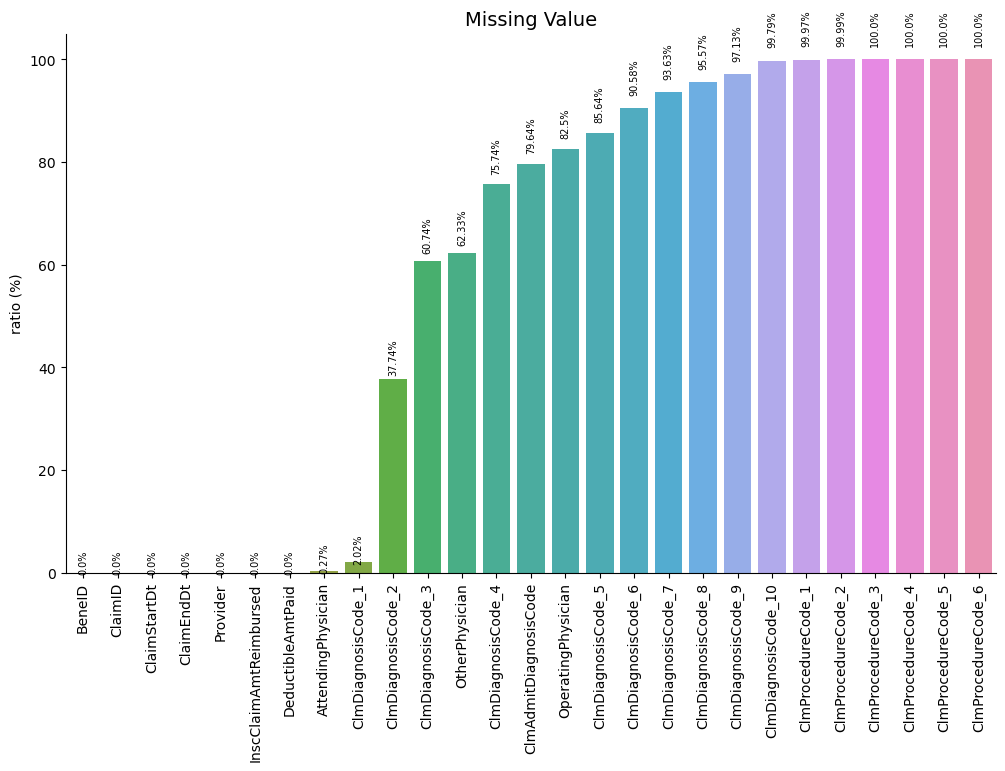

In [41]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Change Invalid Data Type**

In [42]:
Train_Outpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [43]:
# ClaimStartDt  ClaimEndDt  AdmissionDt  DischargeDt (Object > Datetime)

print("Before\nClaimStartDt Dtype \t: ",Train_Outpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Outpatient['ClaimEndDt'].dtypes)

Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'])
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'])

print("After\n\nClaimStartDt Dtype \t: ",Train_Outpatient['ClaimStartDt'].dtypes)
print("ClaimEndDt Dtype \t: ",Train_Outpatient['ClaimEndDt'].dtypes)

Before
ClaimStartDt Dtype 	:  object
ClaimEndDt Dtype 	:  object
After

ClaimStartDt Dtype 	:  datetime64[ns]
ClaimEndDt Dtype 	:  datetime64[ns]


### Univariate & Multivariate Analysis

**Statistic Deskriptif (Numerical)**

In [44]:
Train_Outpatient.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


**Statistic Deskriptif (Categorical)**

In [45]:
Train_Outpatient.select_dtypes(include="object").describe().T

,count,unique,top,freq
BeneID,517737,133980,BENE42721,29
ClaimID,517737,517737,CLM624349,1
Provider,517737,5012,PRV51459,8240
AttendingPhysician,516341,74109,PHY330576,2534
OperatingPhysician,90617,28532,PHY330576,424
OtherPhysician,195046,44388,PHY412132,1247
ClmDiagnosisCode_1,507284,10354,4019,13803
ClmDiagnosisCode_2,322357,5056,4019,19894
ClmDiagnosisCode_3,203257,4448,4019,12126
ClmDiagnosisCode_4,125596,3925,4019,7088


In [46]:
Train_Outpatient.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Text(0.5, 1.02, 'Grafik Distribusi Kondisi Kronis')

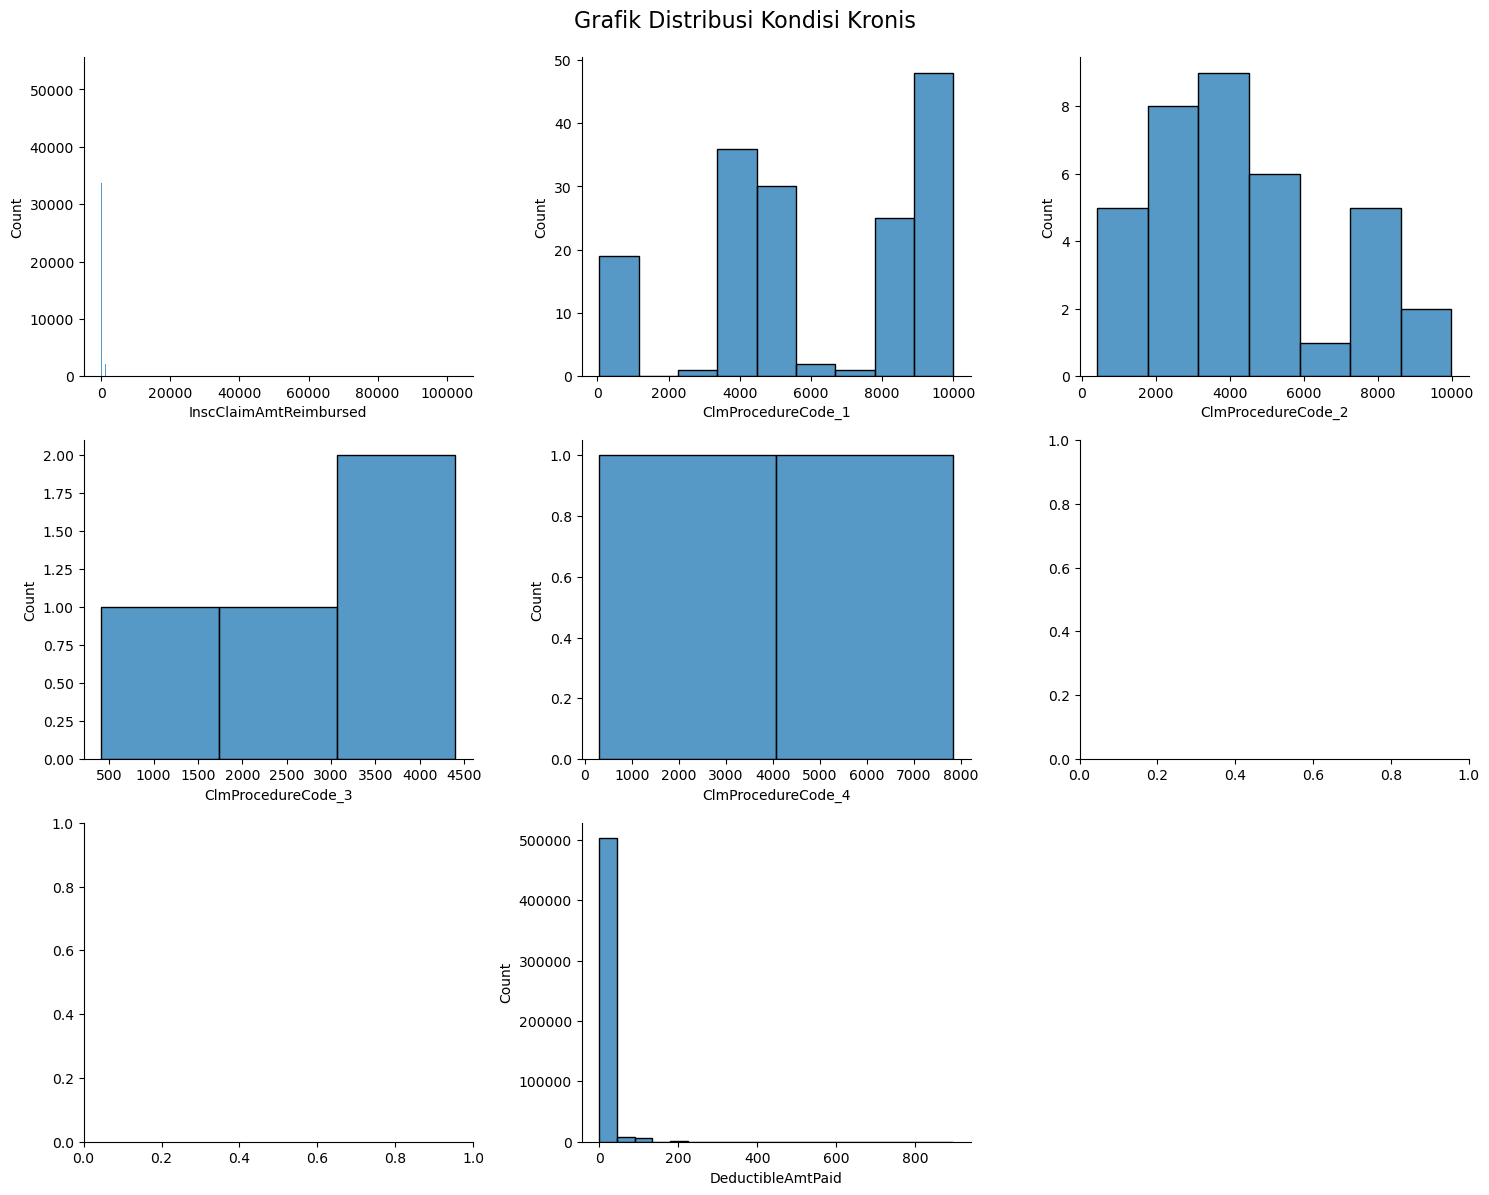

In [47]:
num = Train_Outpatient.select_dtypes(include=['int','float']).columns

plt.figure(figsize=(15,15))

for i in range(len(num)):
    plt.subplot(4,3,i+1)
    fig= sns.histplot(data=Train_Outpatient, x=num[i])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.tight_layout()
plt.suptitle('Grafik Distribusi Kondisi Kronis', fontsize=16, y=1.02)

# Merga Data

## Merge Inpatient vs Outpatient

In [52]:
matches_cols = [col for col in Test_Inpatient.columns if col in Test_Outpatient.columns]
Test_In_out = pd.merge(left=Test_Inpatient, right=Test_Outpatient, left_on=matches_cols, right_on=matches_cols, how="outer")
print(Test_In_out.shape)
# Train_In_out[Train_In_out['BeneID']=='BENE134170']
Test_In_out.head(4)

(135392, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN


In [53]:
matches_cols = [col for col in Train_Inpatient.columns if col in Train_Outpatient.columns]
Train_In_out = pd.merge(left=Train_Inpatient, right=Train_Outpatient, left_on=matches_cols, right_on=matches_cols, how="outer")
print(Train_In_out.shape)
# Train_In_out[Train_In_out['BeneID']=='BENE134170']
Train_In_out.head(4)

(558211, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN


## Merge Beneficiary vs All Patient

In [54]:
Train_Allpatient = Train_Beneficiary.merge(Train_In_out, left_on='BeneID', right_on='BeneID', how='inner')
print(Train_Allpatient.shape)

(558211, 55)


In [56]:
Test_Allpatient = Test_Beneficiary.merge(Test_In_out, left_on='BeneID', right_on='BeneID', how='inner')
print(Test_Allpatient.shape)

(135392, 54)


In [57]:
Train_Allpatient.head(4)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,73,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,NaT,56409,0.0,NaT,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge Potensial Fraud vs All Patient

In [58]:
df_train = Train_Allpatient.merge(Train,how='inner', left_on='Provider', right_on='Provider')
print(df_train.shape)
df_train.head(3)

(558211, 56)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE12511,1944-09-01,NaT,1,1,0,39,510,12,12,2,2,2,2,2,2,1,1,1,2,2,0,0,1250,90,65,CLM724430,2009-12-11,2009-12-11,PRV55912,600,PHY420794,NaN,NaN,NaT,NaN,0.0,NaT,NaN,V560,V4283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,BENE14577,1935-10-01,NaT,2,1,Y,33,70,12,12,2,1,1,2,2,2,2,1,2,2,1,0,0,2390,440,74,CLM567180,2009-09-07,2009-09-07,PRV55912,20,PHY381733,NaN,NaN,NaT,NaN,0.0,NaT,NaN,0401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [59]:
df_test= Test_Allpatient.merge(Test,how='inner', left_on='Provider', right_on='Provider')
print(df_test.shape)
df_test.head(3)

(135392, 54)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,NaN,NaN,0.0,NaN,NaN,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11536,1924-05-01,NaN,1,1,Y,39,70,12,12,2,1,1,2,2,1,1,1,1,2,1,3000,1068,1580,160,CLM169510,2009-02-01,2009-02-01,PRV55962,100,PHY404476,NaN,NaN,NaN,25000,0.0,NaN,NaN,7915,7881,2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE11536,1924-05-01,NaN,1,1,Y,39,70,12,12,2,1,1,2,2,1,1,1,1,2,1,3000,1068,1580,160,CLM189950,2009-02-12,2009-02-12,PRV55962,40,PHY347633,NaN,PHY347633,NaN,NaN,0.0,NaN,NaN,43310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA Potensial Fraud

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   DOB                              558211 non-null  datetime64[ns]
 2   DOD                              4131 non-null    datetime64[ns]
 3   Gender                           558211 non-null  int64         
 4   Race                             558211 non-null  int64         
 5   RenalDiseaseIndicator            558211 non-null  object        
 6   State                            558211 non-null  int64         
 7   County                           558211 non-null  int64         
 8   NoOfMonths_PartACov              558211 non-null  int64         
 9   NoOfMonths_PartBCov              558211 non-null  int64         
 10  ChronicCond_Alzheimer            558211 non-

**Statistical Deskriptif Numerical & Categorical**

In [61]:
df_train.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0
mean,1.578838,1.255011,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,1.587998,1.848615,1.687070,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,73.276820,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN
std,0.493746,0.717437,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,13.011761,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,1.000000,1.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,68.000000,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN
50%,2.000000,1.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,74.000000,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,2.000000,1.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,82.000000,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,100.000000,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [62]:
df_train.select_dtypes(include="object").describe()

,BeneID,RenalDiseaseIndicator,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,PotentialFraud
count,558211,558211,558211,558211,556703,114447,199736,145899,40474,547758,362605,243055,164536,111924,84392,66177,53444,41815,5010,558211
unique,138556,2,558211,5410,82063,35315,46457,4098,736,10450,5300,4756,4359,3970,3607,3388,3070,2774,1158,2
top,BENE118316,0,CLM46614,PRV51459,PHY330576,PHY330576,PHY412132,V7612,882,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,No
freq,29,448363,1,8240,2534,424,1247,4074,179,13886,22378,14408,9188,6005,4170,3014,2257,1581,169,345415


**Missing Value**

In [65]:
miss_value = pd.DataFrame( data = df_train.isna().sum(), columns={'Jumlah Miising Value'}, index=Train_Inpatient.columns)
ratio_miss_value = pd.DataFrame(data=round(df_train.isna().sum() / len(df_train) * 100,2), columns={"ratio (%)"})
null = pd.concat([miss_value,ratio_miss_value],axis=1).sort_values(by='ratio (%)')

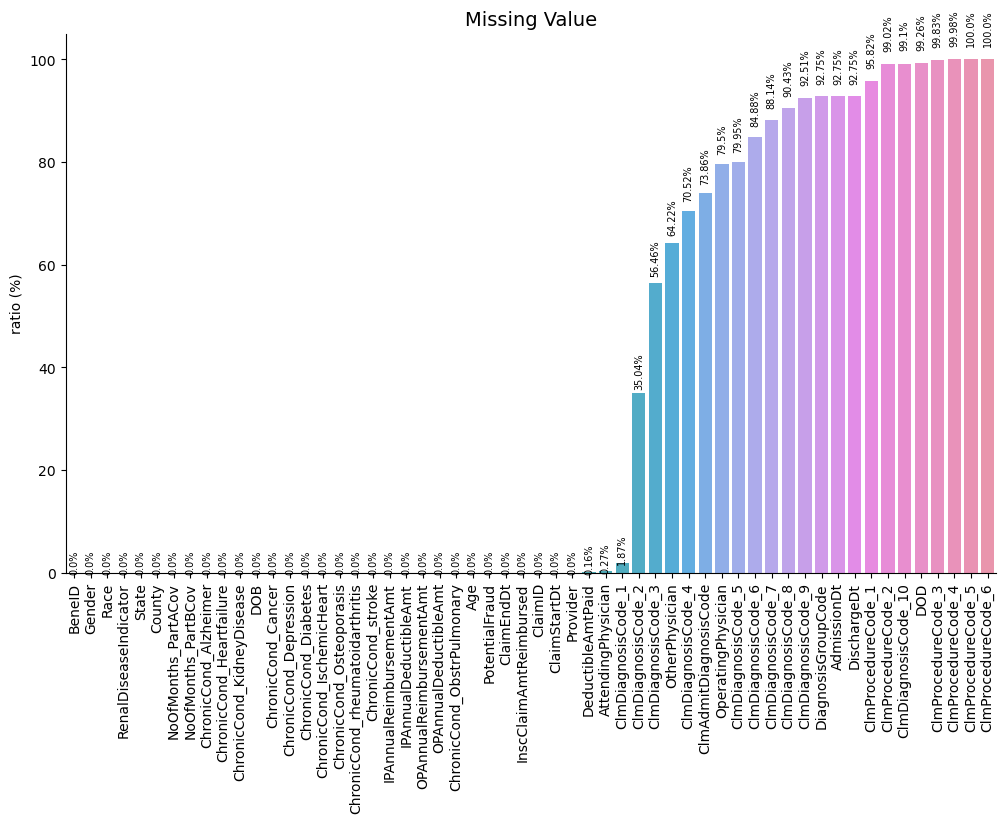

In [66]:
plt.figure(figsize=(12,7))
fig = sns.barplot(data=null, x=null.index, y=null['ratio (%)'])
plt.xticks(rotation=90)
plt.title("Missing Value", fontsize = 14)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=7, rotation=90)

**Duplicated**

In [70]:
print("Total Data Duplikat : ",df_train.duplicated().sum())
print("Total Data 'BeneID' Duplikat : ",df_train.duplicated(subset='BeneID').sum())
print("Total Data 'Provider' Duplikat : ",df_train.duplicated(subset='Provider').sum())


Total Data Duplikat :  0
Total Data 'BeneID' Duplikat :  419655
Total Data 'Provider' Duplikat :  552801


**Value Counts Fraud Potensial (Target)**

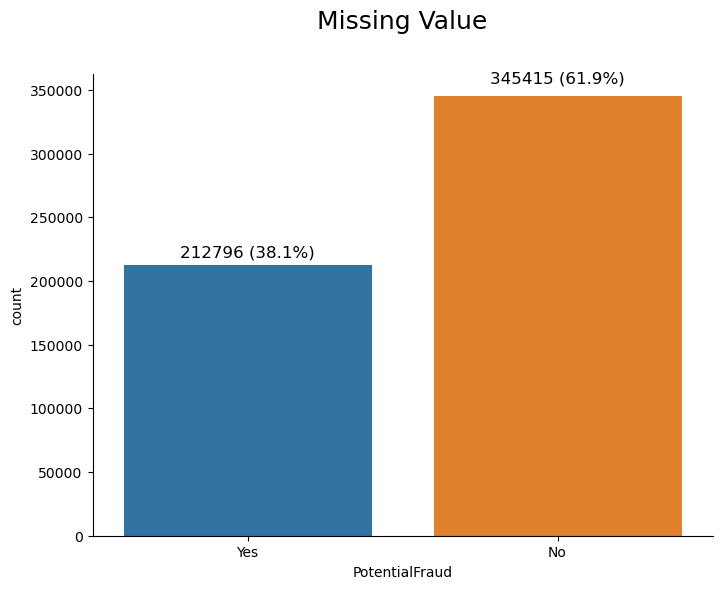

In [93]:
plt.figure(figsize=(8,6))
fig = sns.countplot(data=df_train, x='PotentialFraud')
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.title("Missing Value", fontsize = 18, y=1.08)

for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(height)+ " ("+ str(round((height*100)/df_train.shape[0],1))+"%)"}', (x + width/2, y + height*1.03), ha='center', fontsize=12, rotation=0)

In [94]:
df_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE12511,1944-09-01,NaT,1,1,0,39,510,12,12,2,2,2,2,2,2,1,1,1,2,2,0,0,1250,90,65,CLM724430,2009-12-11,2009-12-11,PRV55912,600,PHY420794,NaN,NaN,NaT,NaN,0.0,NaT,NaN,V560,V4283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


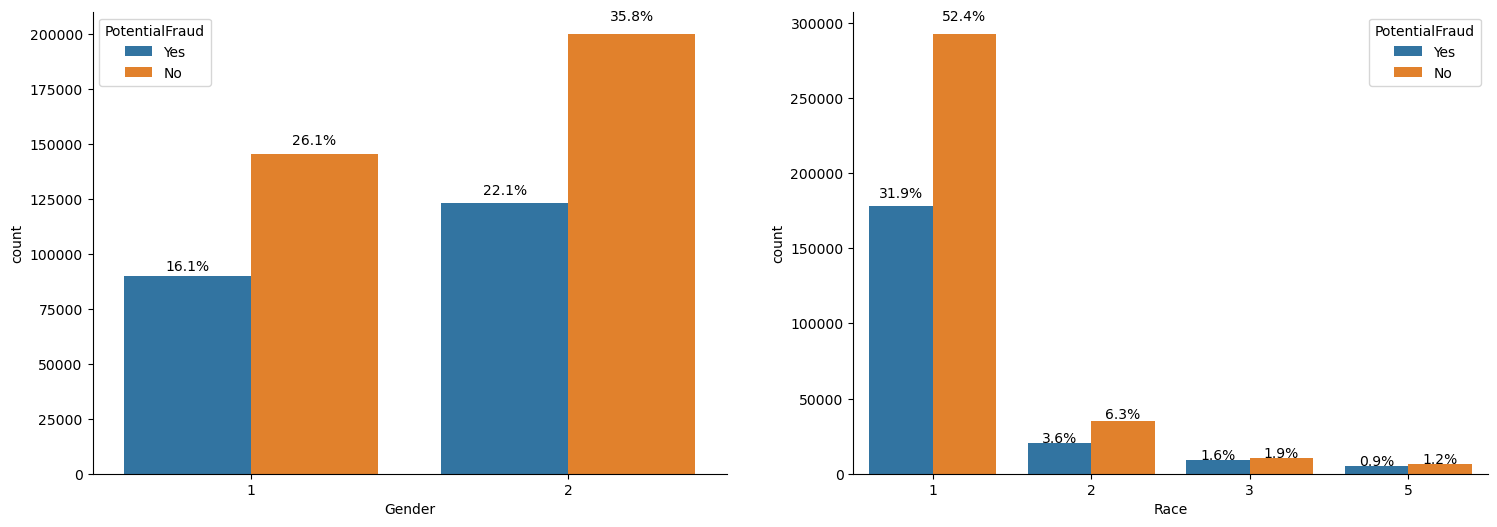

In [114]:
gender_race = ['Gender', 'Race']
plt.figure(figsize=(18,6))

for i in range(len(gender_race)):
    plt.subplot(1,2,i+1)
    fig = sns.countplot(data=df_train, x=gender_race[i], hue="PotentialFraud")
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.title("Value Count", fontsize = 18, y=1.08)
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/df_train.shape[0],1))+"%"}', (x + width/2, y + height*1.03), ha='center', fontsize=10, rotation=0)